# Preprocessing of the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime
import sklearn

In [ ]:
#Import the data for the NJ train network. Month of March 2018. Drop the observations with NaN delay.
df = pd.read_csv('2018_03.csv')
df.dropna(subset=['delay_minutes'], inplace=True)
df.reset_index(drop=True, inplace=True)

Encoding the days of the week (0 : Monday ..., 6 : Sunday) 

In [ ]:
day = []
time = []

for (k,v) in enumerate(df['actual_time']):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    time_only = aux.time()
    day.append(aux.weekday())
    time_in_min = time_only.hour*60 + time_only.minute
    time.append(time_in_min)
    
df['day'] = day
df['time'] = time

Encoding the line names and the departure station with label encoding

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['line'] = le.fit_transform(df['line'])
df['from_id'] = le.fit_transform(df['from_id'])
df['train_id'] = le.fit_transform(df['train_id'])

In [ ]:
df.drop(columns = ['date','from','to','to_id','scheduled_time','status','type','actual_time'], inplace = True)

In [ ]:
tmp = df.copy()

In [ ]:
tmp['label'] = tmp['delay_minutes'].apply(lambda x: 1 if x >0 else 0)

In [ ]:
tmp.drop(columns = ['delay_minutes'],inplace = True)

In [ ]:
df['Logged Delay'] = np.ceil(np.log(df['delay_minutes']+1e-6))

In [ ]:
df.drop(columns = ['delay_minutes'], inplace = True)

In [ ]:
df['Logged Delay']= df['Logged Delay'].apply(lambda x: -1 if x <0 else(2 if x >= 2 else 1))

In [ ]:
plt.hist(df['Logged Delay'],bins = 50)

# Testing data

In [13]:
df2 = pd.read_csv('2018_06.csv')
df2.dropna(subset=['delay_minutes'], inplace=True)
df2.reset_index(drop=True, inplace=True)
day = []
time = []

for (k,v) in enumerate(df2['actual_time']):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    time_only = aux.time()
    day.append(aux.weekday())
    time_in_min = time_only.hour*60 + time_only.minute
    time.append(time_in_min)
    
df2['day'] = day
df2['time'] = time

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df2['line'] = le.fit_transform(df2['line'])
df2['from_id'] = le.fit_transform(df2['from_id'])
df2['train_id'] = le.fit_transform(df2['train_id'])

df2.drop(columns = ['date','from','to','to_id','scheduled_time','status','type','actual_time'], inplace = True)

df2['label'] = df2['delay_minutes'].apply(lambda x: 1 if x >0 else 0)

df2['Logged Delay'] = np.ceil(np.log(df2['delay_minutes']+1e-6))

df2.drop(columns = ['delay_minutes'], inplace = True)
df2['Logged Delay']= df2['Logged Delay'].apply(lambda x: -1 if x <0 else(2 if x >= 2 else 1))

dataset = df2.values.astype(int)
Y_test_binary = df2['label'].values
df2.drop(columns = 'label',inplace = True)
Y_test = df2['Logged Delay'].values
df2.drop(columns = 'Logged Delay',inplace = True)
X_test = df2.values


(array([ 59074.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  76193.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
        102724.]),
 array([-1.  , -0.94, -0.88, -0.82, -0.76, -0.7 , -0.64, -0.58, -0.52,
        -0.46, -0.4 , -0.34, -0.28, -0.22, -0.16, -0.1 , -0.04,  0.02,
         0.08,  0.14,  0.2 ,  0.26,  0.32,  0.38,  0.44,  0.5 ,  0.56,
         0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,  0.98,  1.04,  1.1 ,
         1.16,  1.22,  1.28,  1.34,  1.4 ,  1.46,  1.52,  1.58,  1.64,
         1.7 ,  1.76,  1.82,  1.88,  1.94,  2.  ]),
 <a list of 50 Patch objects>)

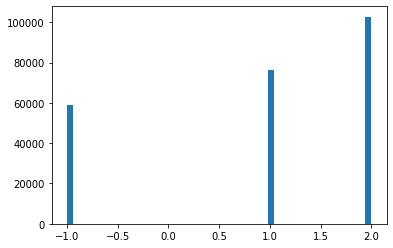

In [14]:
plt.hist(Y_test,bins = 50)

In [15]:
X_test.shape

(237991, 6)

 # Split Data

In [16]:
def split_data(x, y, ratio, myseed=1):
    """split the dataset based on the split ratio.
        Returns x1 , x2 , y1 , y2
    """
    # set seed
    np.random.seed(myseed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    indices = range(len(y))
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

In [17]:
tmp

,train_id,stop_sequence,from_id,line,day,time,label
0,562,1.0,97,7,4,81,0
1,562,2.0,97,7,4,91,1
2,562,3.0,159,7,4,100,1
3,562,4.0,99,7,4,105,1
4,562,5.0,155,7,4,109,1
...,...,...,...,...,...,...,...
243023,121,2.0,12,4,5,1145,1
243024,121,3.0,47,4,5,1148,1
243025,121,4.0,16,4,5,1150,1
243026,121,5.0,145,4,5,1161,1


In [18]:
Y_sc = tmp['label'].values
tmp.drop(columns = ['label'],inplace = True)
X_sc = tmp.values

In [19]:
X_sc.shape

(243028, 6)

In [20]:
Y_m = df['Logged Delay'].values
df.drop(columns = 'Logged Delay',inplace = True)
X_m = df.values

In [21]:
X_m.shape

(243028, 6)

In [22]:
X = X_sc.copy()
Y = Y_sc.copy()

In [23]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PowerTransformer

scalar = MinMaxScaler()
X = scalar.fit_transform(X)
ratio=0.8
train_size=int(dataset.shape[0]*ratio)
train_set=X[0:train_size]
test_Set=X[train_size:]
labels_train=Y[0:train_size]
labels_validation=Y[train_size:]

In [24]:
x_tr, x_te, y_tr, y_te=split_data(train_set,labels_train,ratio)

In [62]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense,Dropout,Reshape
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

model1 = Sequential()
model1.add(Dense(12, input_dim=X_sc.shape[1], activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
model1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_64 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [26]:
history_binary = model1.fit(x_tr, y_tr, epochs=10, batch_size=10, verbose=1,validation_data = (x_te,y_te))

Train on 152313 samples, validate on 38079 samples
Epoch 1/10
152313/152313 [==============================] - 15s 98us/step - loss: 0.3817 - accuracy: 0.8635 - val_loss: 0.3449 - val_accuracy: 0.8684
Epoch 2/10
152313/152313 [==============================] - 15s 96us/step - loss: 0.3439 - accuracy: 0.8691 - val_loss: 0.3253 - val_accuracy: 0.8806
Epoch 3/10
152313/152313 [==============================] - 15s 97us/step - loss: 0.3352 - accuracy: 0.8742 - val_loss: 0.3236 - val_accuracy: 0.8789
Epoch 4/10
152313/152313 [==============================] - 15s 99us/step - loss: 0.3329 - accuracy: 0.8751 - val_loss: 0.3212 - val_accuracy: 0.8789
Epoch 5/10
152313/152313 [==============================] - 15s 98us/step - loss: 0.3313 - accuracy: 0.8757 - val_loss: 0.3184 - val_accuracy: 0.8820
Epoch 6/10
152313/152313 [==============================] - 15s 97us/step - loss: 0.3299 - accuracy: 0.8764 - val_loss: 0.3327 - val_accuracy: 0.8825
Epoch 7/10
152313/152313 [=======================

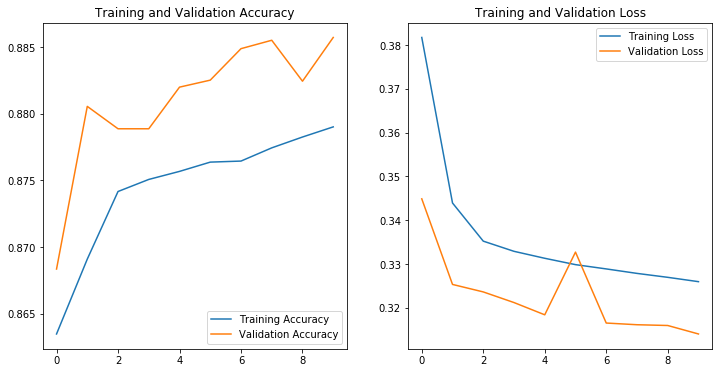

In [27]:
acc = history_binary.history['accuracy']
val_acc = history_binary.history['val_accuracy']

loss = history_binary.history['loss']
val_loss = history_binary.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluate Model on a new dataset

In [28]:
model1.evaluate(scalar.fit_transform(X_test), y = Y_test_binary, batch_size=30, verbose=1)

237991/237991 [==============================] - 3s 12us/step


[0.3829442111924852, 0.856738269329071]

In [145]:
X = X_m.copy()
Y = Y_m.copy()

In [146]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PowerTransformer,Normalizer
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
minY = min(Y)
maxY = max(Y)
Y = (Y-minY)/(maxY-minY)

In [147]:
X.shape

(243028, 6)

In [159]:
ratio=0.8
train_size=int(dataset.shape[0]*ratio)
train_set=X[0:train_size]
test_Set=X[train_size:]
labels_train=Y[0:train_size]
labels_validation=Y[train_size:]
x_tr, x_te, y_tr, y_te=split_data(train_set,labels_train,ratio)

In [160]:
model2 = Sequential()
model2.add(Dense(32, input_dim=X_sc.shape[1], activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(3, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.compile(loss='mean_squared_error', optimizer='adam',
                metrics=['accuracy'])
model2.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 32)                224       
_________________________________________________________________
dense_150 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_151 (Dense)            (None, 3)                 51        
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 4         
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


In [161]:
history_3classes = model2.fit(x_tr, y_tr, epochs=10, batch_size=10, verbose=1,validation_data = (x_te,y_te),shuffle = True)

Train on 152313 samples, validate on 38079 samples
Epoch 1/10
152313/152313 [==============================] - 17s 108us/step - loss: 0.1446 - accuracy: 0.4529 - val_loss: 0.1414 - val_accuracy: 0.4702
Epoch 2/10
152313/152313 [==============================] - 16s 102us/step - loss: 0.1358 - accuracy: 0.4701 - val_loss: 0.1324 - val_accuracy: 0.4800
Epoch 3/10
152313/152313 [==============================] - 16s 105us/step - loss: 0.1343 - accuracy: 0.4720 - val_loss: 0.1313 - val_accuracy: 0.4853
Epoch 4/10
152313/152313 [==============================] - 16s 103us/step - loss: 0.1331 - accuracy: 0.4736 - val_loss: 0.1317 - val_accuracy: 0.4840
Epoch 5/10
152313/152313 [==============================] - 15s 102us/step - loss: 0.1318 - accuracy: 0.4749 - val_loss: 0.1281 - val_accuracy: 0.4861
Epoch 6/10
152313/152313 [==============================] - 16s 102us/step - loss: 0.1306 - accuracy: 0.4772 - val_loss: 0.1326 - val_accuracy: 0.4873
Epoch 7/10
152313/152313 [=================

In [162]:
df

,train_id,stop_sequence,from_id,line,day,time
0,562,1.0,97,7,4,81
1,562,2.0,97,7,4,91
2,562,3.0,159,7,4,100
3,562,4.0,99,7,4,105
4,562,5.0,155,7,4,109
...,...,...,...,...,...,...
243023,121,2.0,12,4,5,1145
243024,121,3.0,47,4,5,1148
243025,121,4.0,16,4,5,1150
243026,121,5.0,145,4,5,1161


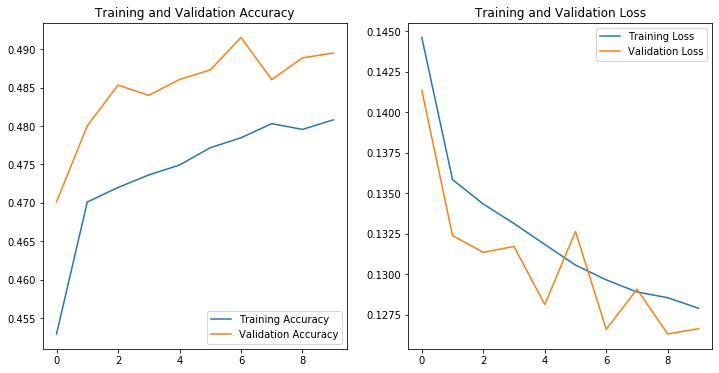

In [163]:
acc = history_3classes.history['accuracy']
val_acc = history_3classes.history['val_accuracy']

loss = history_3classes.history['loss']
val_loss = history_3classes.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [164]:
model2.evaluate(scalar.fit_transform(X_test), y = (Y_test-minY)/(maxY-minY), batch_size=10, verbose=1)

237991/237991 [==============================] - 8s 35us/step


[0.13940356531175185, 0.4807450771331787]

# Regression

In [165]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1))
    for deg in range(1, degree + 1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

In [166]:
X = X_m.copy()
Y = Y_m.copy()
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
sinx = np.sin(X)
cosx = np.cos(X)
ex = np.exp(X)
logx = np.log(X+1)
X = np.append(X,sinx,axis=1)
X = np.append(X,cosx,axis=1)
X = np.append(X,ex,axis=1)
X = np.append(X,logx,axis=1)
X = build_poly(X, 5)

In [167]:
X_test_reg = X_test.copy()
scalar = MinMaxScaler()
X_test_reg = scalar.fit_transform(X_test_reg)

In [168]:
sinx = np.sin(X_test_reg)
cosx = np.cos(X_test_reg)
ex = np.exp(X_test_reg)
logx = np.log(X_test_reg+1)
X_test_reg = np.append(X_test_reg,sinx,axis=1)
X_test_reg = np.append(X_test_reg,cosx,axis=1)
X_test_reg = np.append(X_test_reg,ex,axis=1)
X_test_reg = np.append(X_test_reg,logx,axis=1)
X_test_reg = build_poly(X_test_reg, 5)

In [169]:
X.shape

(243028, 151)

In [170]:
from sklearn.linear_model import Ridge,SGDRegressor,LinearRegression
clf = LinearRegression()
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
y_pred = clf.predict(X_test_reg)

In [172]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
mean_squared_error(Y_test, y_pred)

1.2183617728919474

In [173]:
r2_score( Y_test, y_pred)

0.14218446280029529